<a href="https://colab.research.google.com/github/adamiaonr/cveml/blob/main/projects/project-001/scripts/notebooks/cveml_dnn_cnn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


In [72]:
# create necessary folders
INPUT_DIR = "/content/data"
OUTPUT_DIR = "/content/output"

!rm -rf "{OUTPUT_DIR}"

try:
  os.makedirs(OUTPUT_DIR)
  os.makedirs(os.path.join(OUTPUT_DIR, 'img'))
  os.makedirs(os.path.join(OUTPUT_DIR, 'data'))
  os.makedirs(INPUT_DIR)
except FileExistsError:
  print("WARNING: directory already exists. check to make sure it is empty.")

# data filenames
MODEL_COMPARISON_FILE = 'cveml-dnn-cnn-model-comparison.csv'
LIVE_PERFORMANCE_FILE = 'cveml-dnn-cnn-live-performance-sensitivity.csv'


In [73]:
# load result data

model_comparison_data = pd.read_csv(os.path.join(INPUT_DIR, MODEL_COMPARISON_FILE))
live_performance_data = pd.read_csv(os.path.join(INPUT_DIR, LIVE_PERFORMANCE_FILE))


,id,id-str,version,model-description-short,model-description-long,dataset-size,train-epochs
0,0,dnn-non-augmented,v1.0.1,dnn-base,"2 layers, 64 neuron each",50,200
1,1,dnn-augmented,v1.0.3,dnn-base,"2 layers, 64 neuron each",2000,200
2,2,dnn-augmented,NaN,dnn-base,"2 layers, 64 neuron each",4000,100
3,3,dnn-augmented-extra-neurons,v1.0.4,dnn-2x-neuron,"2 layers, 128 neuron each",2000,200
4,4,dnn-augmented-extra-neurons,v1.0.5,dnn-2x-neuron,"2 layers, 128 neuron each",4000,100
5,5,dnn-augmented-extra-layer,NaN,dnn-extra-layer,"3 layers, 64 neuron each",2000,200
6,6,dnn-augmented-extra-layer,NaN,dnn-extra-layer,"3 layers, 64 neuron each",4000,100
7,7,cnn-not-augmented,NaN,cnn-base,"2D conv/pool layer (32 filters, kernel size 3,...",50,200
8,8,cnn-not-augmented-larger-kernel-size,NaN,cnn-larger-kernel,"2D conv/pool layer (32 filters, kernel size 5,...",50,200
9,9,cnn-not-augmented-extra-layer,NaN,cnn-larger-kernel-extra-layer,"2D conv/pool layer (32 filters, kernel size 5,...",50,200


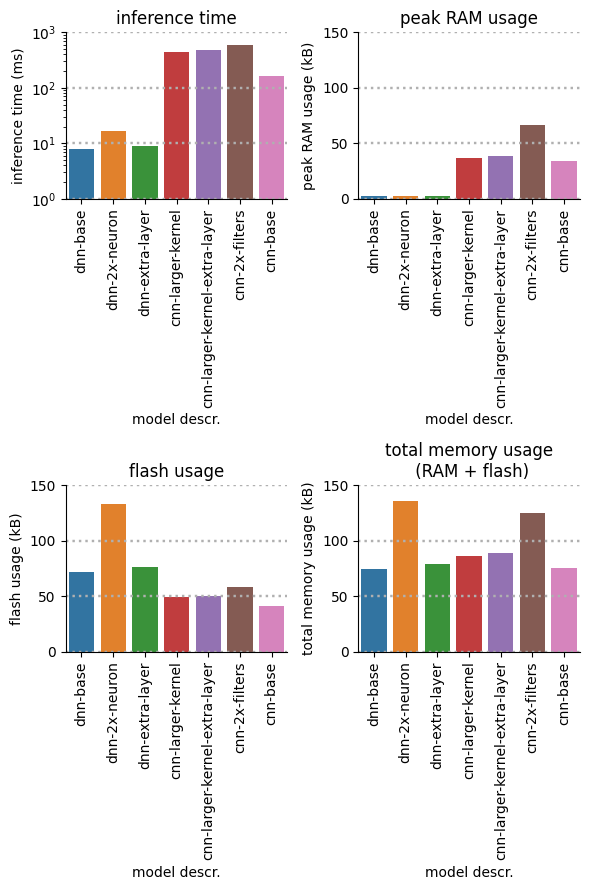

In [74]:
# model performance graphs
model_summary_data = model_comparison_data[['id', 'id-str', 'version', 'model-description-short', 'model-description-long', 'dataset-size', 'train-epochs']].reset_index(drop = True)
model_summary_data.to_csv(os.path.join(OUTPUT_DIR, 'data/model-summary.csv'), index = False)
display(model_summary_data)

# bar graph with inference times, peak RAM usage and flash size
deployment_data = model_comparison_data.sort_values(by = ['accuracy-test'], ascending = False).drop_duplicates(
    subset = ['model-description-short'])[[
                                        'id', 
                                        'model-description-short', 
                                        'inference-time', 
                                        'peak-RAM-usage', 
                                        'flash-usage']]

deployment_data = deployment_data.sort_values(by = ['id']).reset_index(drop = True)

fig = plt.figure(figsize = (2 * 3.0, 2 * 4.5), dpi = 100)

ax = fig.add_subplot(2, 2, 1)
ax.xaxis.grid(True, ls = 'dotted', lw = 1.75)
ax.yaxis.grid(True, ls = 'dotted', lw = 1.75)

sb.barplot(x = deployment_data['model-description-short'], y = deployment_data['inference-time'], ax = ax)
ax.set_title('inference time')
ax.set_xlabel('model descr.')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('inference time (ms)')
ax.set_yscale('log')
ax.set_ylim([1, 1000])
sb.despine()

ax = fig.add_subplot(2, 2, 2)
ax.xaxis.grid(True, ls = 'dotted', lw = 1.75)
ax.yaxis.grid(True, ls = 'dotted', lw = 1.75)

sb.barplot(x = deployment_data['model-description-short'], y = deployment_data['peak-RAM-usage'], ax = ax)
ax.set_title('peak RAM usage')
ax.set_xlabel('model descr.')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('peak RAM usage (kB)')
ax.set_ylim([0, 150])
sb.despine()

ax = fig.add_subplot(2, 2, 3)
ax.xaxis.grid(True, ls = 'dotted', lw = 1.75)
ax.yaxis.grid(True, ls = 'dotted', lw = 1.75)

sb.barplot(x = deployment_data['model-description-short'], y = deployment_data['flash-usage'], ax = ax)
ax.set_title('flash usage')
ax.set_xlabel('model descr.')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('flash usage (kB)')
ax.set_ylim([0, 150])
sb.despine()

ax = fig.add_subplot(2, 2, 4)
ax.xaxis.grid(True, ls = 'dotted', lw = 1.75)
ax.yaxis.grid(True, ls = 'dotted', lw = 1.75)

sb.barplot(x = deployment_data['model-description-short'], y = deployment_data['flash-usage'] + deployment_data['peak-RAM-usage'], ax = ax)
ax.set_title('total memory usage\n (RAM + flash)')
ax.set_xlabel('model descr.')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('total memory usage (kB)')
ax.set_ylim([0, 150])
sb.despine()

fig.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'img/memory-usage.png'), bbox_inches = 'tight', format = 'png')


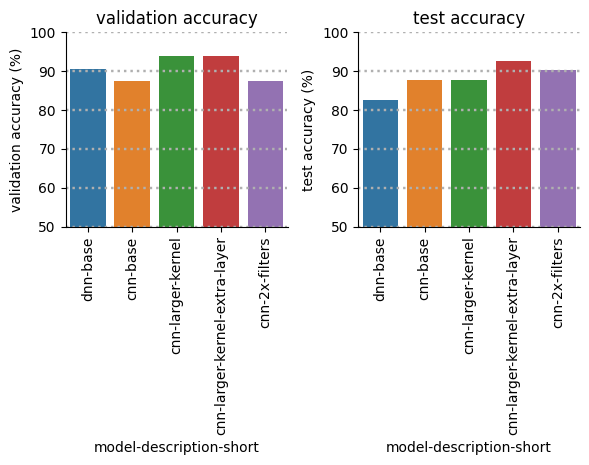

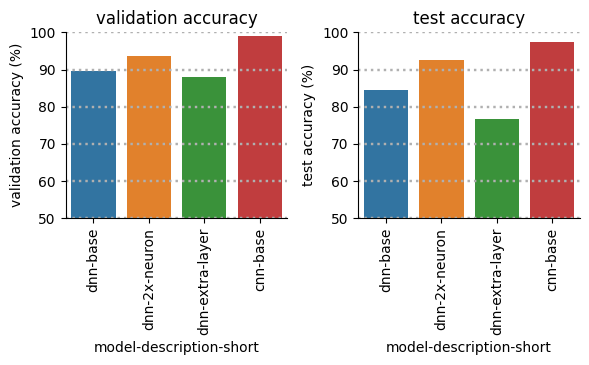

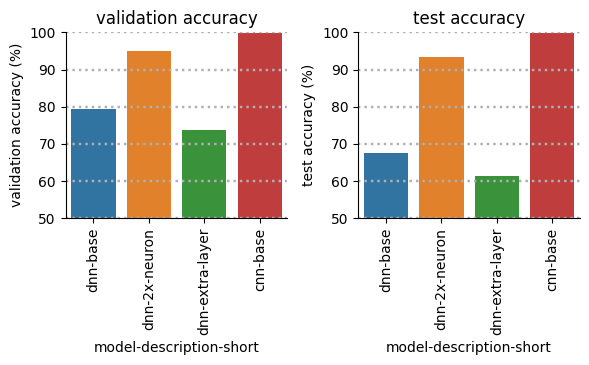

In [81]:
# model accuracy graphs
performance_data = model_comparison_data.sort_values(by = ['id'], ascending = True).reset_index(drop = True)

# generate 3 sets of 2 images, one set per dataset type
for i, dataset in enumerate(['base', 'augmented-transl-rot', 'augmented-transl-larger']):
  
  fig = plt.figure(figsize = (3.0 * 2.0, 3.75 if i > 0 else 4.75), dpi = 100)

  _performance_data = performance_data[performance_data['dataset'].isin([dataset])].reset_index(drop = True)

  ax = fig.add_subplot(1, 2, 1)
  ax.xaxis.grid(True, ls = 'dotted', lw = 1.75)
  ax.yaxis.grid(True, ls = 'dotted', lw = 1.75)

  sb.barplot(x = _performance_data['model-description-short'], y = _performance_data['accuracy-validation'], ax = ax)
  ax.set_title('validation accuracy')
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
  ax.set_ylabel('validation accuracy (%)')
  ax.set_ylim([50.0, 100.0])
  sb.despine()

  ax = fig.add_subplot(1, 2, 2)
  ax.xaxis.grid(True, ls = 'dotted', lw = 1.75)
  ax.yaxis.grid(True, ls = 'dotted', lw = 1.75)

  sb.barplot(x = _performance_data['model-description-short'], y = _performance_data['accuracy-test'], ax = ax)
  ax.set_title('test accuracy')
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
  ax.set_ylabel('test accuracy (%)')
  ax.set_ylim([50.0, 100.0])
  sb.despine()

  fig.tight_layout()

  plt.savefig(os.path.join(OUTPUT_DIR, 'img/accuracy-%s.png' % (dataset)), bbox_inches = 'tight', format = 'png')


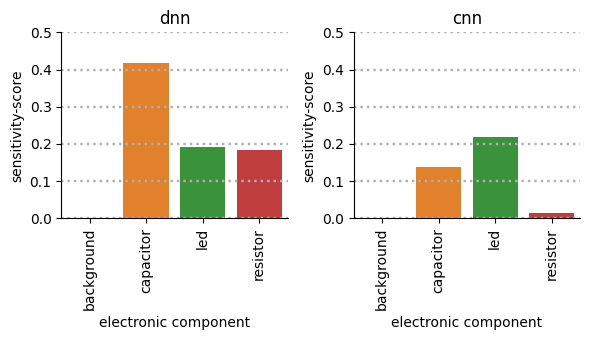

In [85]:
# score distributions for sensitivity analysis
# compare DNN (id 4) and CNN (id 12) models

# calculate 'pre' sensitivity scores for each individual inference result
sensitivity_data = live_performance_data
sensitivity_data['sensitivity-score'] = 0.0
for c in ['resistor', 'led', 'capacitor', 'background']:
  sensitivity_data.loc[sensitivity_data['type'].isin([c]), 'sensitivity-score'] = abs(1.0 - sensitivity_data[sensitivity_data['type'].isin([c])][c])

# show sensitivity scores per {'version', 'electrical component type'}
sensitivity_data = sensitivity_data.groupby(['version', 'type'])['sensitivity-score'].std().reset_index(drop = False)

fig = plt.figure(figsize = (3.0 * 2.0, 3.5), dpi = 100)
for i, (version, label) in enumerate({'v1.0.5' : 'dnn', 'v2.0.2' : 'cnn'}.items()):
  ax = fig.add_subplot(1, 2, i + 1)
  ax.xaxis.grid(True, ls = 'dotted', lw = 1.75)
  ax.yaxis.grid(True, ls = 'dotted', lw = 1.75)

  _data = sensitivity_data[sensitivity_data['version'].isin([version])]
  sb.barplot(x = 'type', y = 'sensitivity-score', data = _data, ax = ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
  ax.set_title(label)
  ax.set_xlabel('electronic component')
  ax.set_ylim([0.0, .5])
  sb.despine()

  i = i + 1

fig.tight_layout()

plt.savefig(os.path.join(OUTPUT_DIR, 'img/sensitivity.png'), bbox_inches = 'tight', format = 'png')


In [142]:
# returns f1 scores for the given data
def get_confusion_matrix(data, labels):
  confusion_matrix = data[['type'] + labels].reset_index(drop = True)
  confusion_matrix['predicted'] = confusion_matrix[labels].idxmax(axis = 1)
  confusion_matrix = pd.crosstab(confusion_matrix['type'], confusion_matrix['predicted'], rownames = ['type'], colnames = ['predicted'])

  return confusion_matrix.reset_index(drop = False).rename(columns = {'type' : ''})

def get_f1_score(confusion_matrix, labels):
  cm = confusion_matrix[labels].to_numpy()
  tp = np.diag(cm)
  fp = np.sum(cm, axis = 0) - tp
  fn = np.sum(cm, axis = 1) - tp
  p = tp / (tp + fp)
  r = tp / (tp + fn)

  return 2 * (p * r) / (p + r)


In [154]:
# alternative sensitivity analysis : F1 scores per class 
#   - F1 = 2 * (precision * recall) / (precision + recall)
#   - precision : tp / (tp + fp) : evaluates classifier's ability to only identify positive cases as 'positive'
#   - recall : tp / (tp + fn) : evaluates classifier's ability to indentify all positive cases

# labels
labels = ['background', 'capacitor', 'led', 'resistor'] 

for i, (version, label) in enumerate({'v1.0.5' : 'dnn', 'v2.0.2' : 'cnn'}.items()):
  _data = live_performance_data[live_performance_data['version'].isin([version])]
  # generate confusion matrix
  confusion_matrix = get_confusion_matrix(_data, labels)
  # calculate f1 scores
  f1 = get_f1_score(confusion_matrix, labels)
  # append f1 score to bottom of confustion matrix
  confusion_matrix = confusion_matrix.append(pd.DataFrame(np.array([f1]), columns = labels), ignore_index = True).fillna('f1 score')
  display(confusion_matrix)
  confusion_matrix.to_csv(os.path.join(OUTPUT_DIR, 'data/confusion-%s.csv' % (label)), index = False)


,,background,capacitor,led,resistor
0,background,12.0,0.000000,0.000000,0.000000
1,capacitor,0.0,25.000000,10.000000,1.000000
2,led,0.0,7.000000,29.000000,0.000000
3,resistor,0.0,0.000000,6.000000,30.000000
4,f1 score,1.0,0.735294,0.716049,0.895522


,,background,capacitor,led,resistor
0,background,12.00,0.000000,0.000000,0.000000
1,capacitor,0.00,35.000000,0.000000,1.000000
2,led,1.00,2.000000,33.000000,0.000000
3,resistor,0.00,0.000000,0.000000,36.000000
4,f1 score,0.96,0.958904,0.956522,0.986301
